tidyish code for doing yearly output of OmA_depth

In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches

import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow

%matplotlib inline

In [130]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [137]:

td = '01jan15'
tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/pngs/'
w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')

dp = [0,18,23,26]
# for i in range(0,len(dp)):
#     print('At depth level ', str(dp[i]), ' depth is ', str(w['Profiles']['depth'][dp[i]]))

In [138]:
test_prof = w['Profiles']['OmA_prof'][0,:]

#print(test_prof)

dp = np.array([0,10,20,30,40])
#should find ind 3
tp_1 = np.array([1.2,1.2,1.2,0.9,0.9])
#should return nan
tp_2 = np.array([1.2,1.2,1.2,1.2,1.2])
#should find index 3
tp_3 = np.array([1.2,0.9,1.2,0.9,0.9])
# should return nan
tp_4 = np.array([1.2,1.2,1.2,0.9,1.2])
#should return 000000
tp_5 = np.array([0.9,0.9,0.9,0.9,0.9])


def find_depth(dp,prof):
    #finds saturation horizon given a profile and corresponding depths
    first_proper_undersat = np.nan
    depth_undersat = np.nan    
    dummy_var = 0
    t_ind = np.where(prof<1)
    t_indss = np.where(prof>=1)
    t_indar = t_ind[0]
    t_indsssar = t_indss[0]
    if t_indar.size == 0:
        #print('saturated watercolumn!')
        dummy_var = 0
    else:
        if (t_indar.size != 0) & (t_indsssar.size == 0):
            depth_undersat = 0
            first_proper_undersat = 0
            dummy_var = 0
            #print('undersat to surface!')
            max_supsat = np.nan
        else:    
            max_supsat = np.max(t_indsssar)    
            try:
                first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
            except:
                dummy_var = 0
                #print("An exception occurred")
            if first_proper_undersat == 0:
                depth_undersat = dp[0]
            if np.isnan(first_proper_undersat):
                dummy_var = 0
                #print('saturated watercolumn!')
            else:
                depth_undersat = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    return first_proper_undersat, depth_undersat

# print('TP1')
# print(tp_1)
# fu, du = find_depth(depths,tp_1)
# print(fu, du)
# print('TP2')
# print(tp_2)
# fu, du = find_depth(depths,tp_2)
# print(fu, du)
# print('TP3')
# print(tp_3)
# fu, du = find_depth(depths,tp_3)
# print(fu, du)
# print('TP4')
# print(tp_4)
# fu, du = find_depth(depths,tp_4) 
# print(fu, du)
# print('TP5')
# print(tp_5)
# fu, du = find_depth(depths,tp_5) 
# print(fu, du)

In [75]:
start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
date_array = []
for i in range(0,len(arrow_array)):    
    q = arrow_array[i][0]
    ddmmmyy = q.format('DDMMMYY').lower()    
    date_array.append(ddmmmyy)


In [76]:
OmA_dict_BR = {'OmA_sathor' : np.zeros([12,365])}
OmA_dict_PI = {'OmA_sathor' : np.zeros([12,365])}

for d in range(0,len(date_array)):
    td = date_array[d]
    tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/pngs/'
    w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')
    if d%60 == 0:
        print(td)
    
    sa = w['Profiles']['OmA_prof']
    sd = w['Profiles']['depth']
    for s in range(0,12):
        t_prof = sa[s,:]
        fu, du = find_depth(sd,t_prof) 
        OmA_dict_BR['OmA_sathor'][s,d] = du
        
for d in range(0,len(date_array)):
    td = date_array[d]
    tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/pngs/'
    w = nc.Dataset(f'{tdir}/PI2015_{td}_prof.nc')
    if d%60 == 0:
        print(td)
    
    sa = w['Profiles']['OmA_prof']
    sd = w['Profiles']['depth']
    for s in range(0,12):
        t_prof = sa[s,:]
        fu, du = find_depth(sd,t_prof) 
        OmA_dict_PI['OmA_sathor'][s,d] = du

01jan15


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater_equal


02mar15
01may15
30jun15
29aug15
28oct15
27dec15
01jan15
02mar15
01may15
30jun15
29aug15
28oct15
27dec15


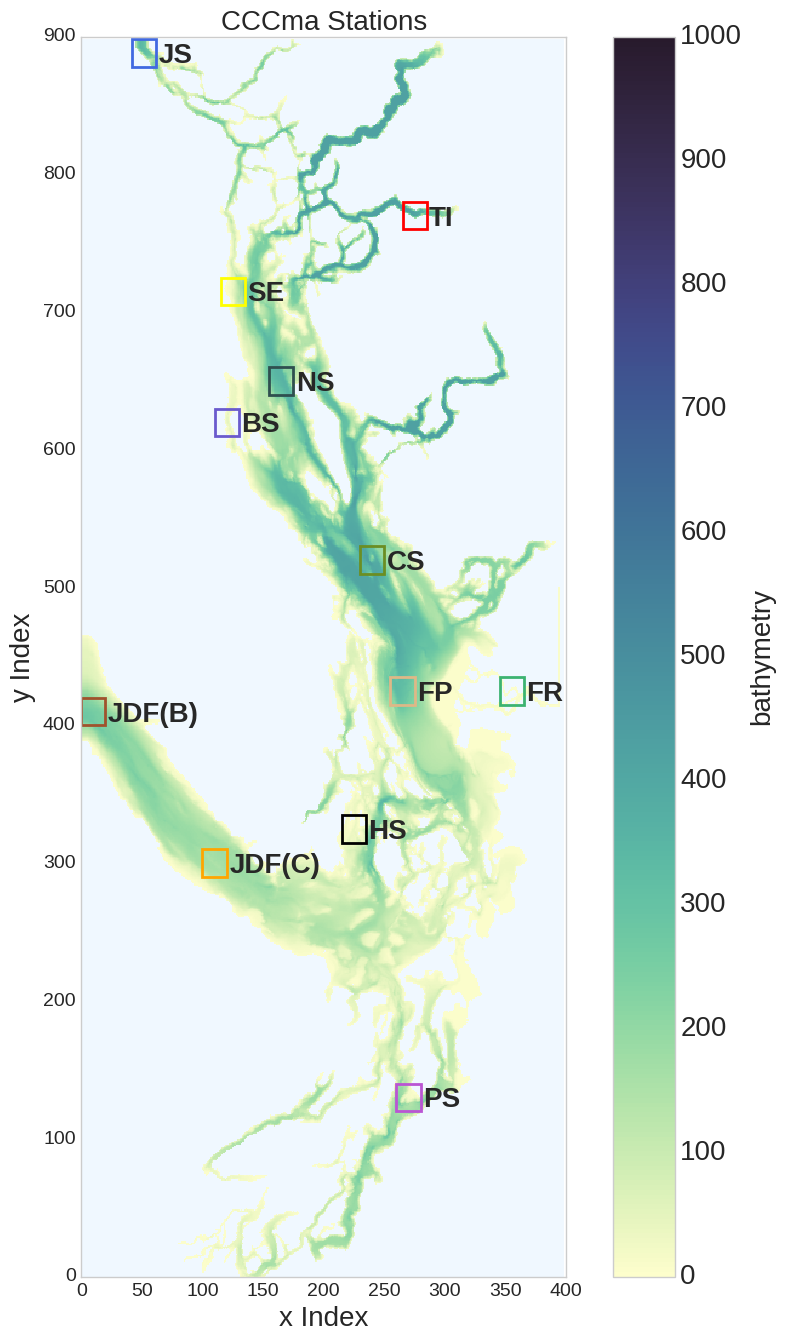

In [77]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

CCCma.one_panel_plot(bath1, cs.STATIONS, 'CCCma Stations', \
               cm.cm.deep,12,16,0,1000,'bathymetry','')

(1, 365)

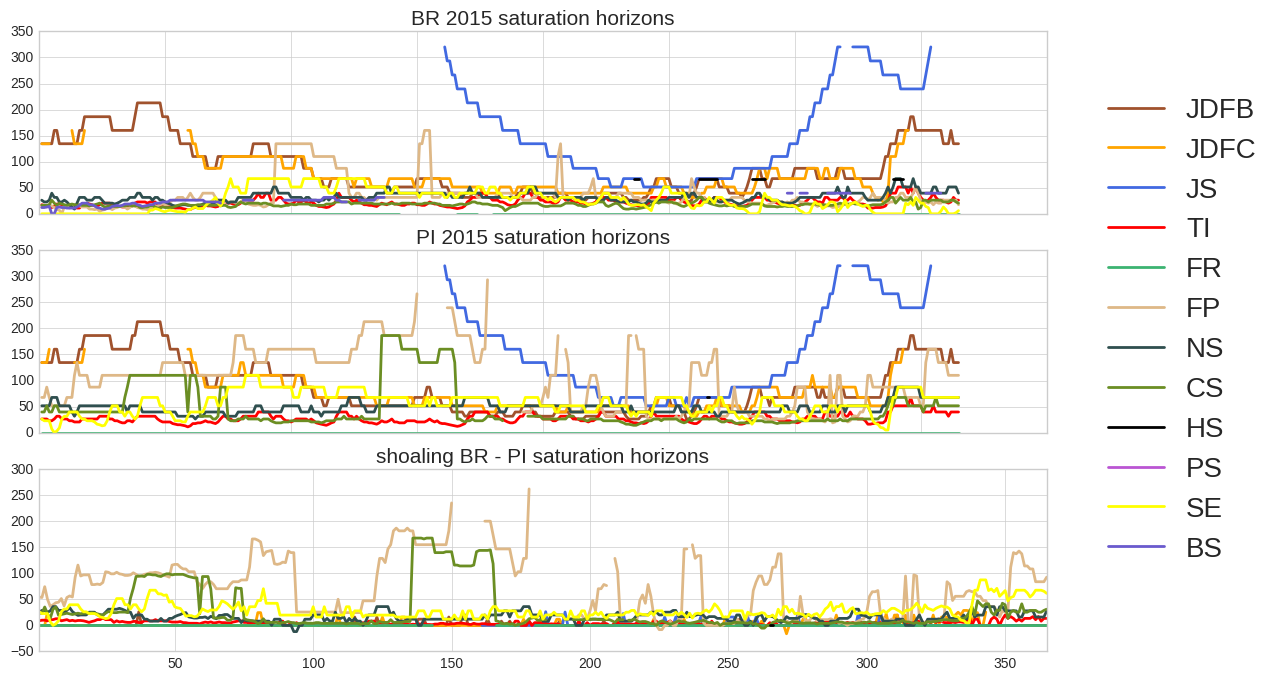

In [105]:
#['sal','temp','DIC','TA','OmA','pH','O2']


pt = ['sal_pt', 'temp_pt' , 'DIC_pt' , 'TA_pt' ,'OmA_pt' , 'pH_pt' , 'O2_pt' ]
sd = ['sal_sd', 'temp_sd' , 'DIC_sd' , 'TA_sd' ,'OmA_sd' , 'pH_sd' , 'O2_sd' ]
yl = ['salinity', 'temperature' , 'DIC' , 'TA' ,'Om A' , 'pH' , 'O2' ]
ymin = [0,0,0,0,0,7.2,0]
ymax = [35,25,2200,2200,3,8.6,320]
stns = ['JDFB','JDFC','JS','TI','FR','FP','NS','CS','HS','PS','SE','BS']
for c in range(0,len(cs.STATIONS)):
    stn = stns[c]
    #print(cs.STATIONS[stn]['color'])
    
t = np.arange(1,366,1)
fx = 13
fy = 8
fig = plt.figure(figsize=(fx,fy))


ax = fig.add_subplot(3,1,1)

for s in range(0,12):
    stn = stns[s]
    pattern = OmA_dict_BR['OmA_sathor'][s,:]    
    ax.plot(t, pattern, color = cs.STATIONS[stn]['color'],linewidth = 2 )
    ax.set_title('BR 2015 saturation horizons', fontsize = '15')
    ax.set_xticklabels([])
ax = fig.add_subplot(3,1,2)

for s in range(0,12):
    stn = stns[s]
    pattern = OmA_dict_PI['OmA_sathor'][s,:]    
    ax.plot(t, pattern, color = cs.STATIONS[stn]['color'],linewidth = 2 )
    ax.set_title('PI 2015 saturation horizons', fontsize = '15')
    ax.legend(stns , fontsize = 20, bbox_to_anchor=(1.05, 1.9), loc=2, borderaxespad=0.)
    ax.set_xticklabels([])
ax = fig.add_subplot(3,1,3)

for s in range(0,12):
    stn = stns[s]
    pattern = OmA_dict_PI['OmA_sathor'][s,:] - OmA_dict_BR['OmA_sathor'][s,:]
    ax.plot(t, pattern, color = cs.STATIONS[stn]['color'],linewidth = 2 )
    ax.set_title('shoaling BR - PI saturation horizons', fontsize = '15')

ax.set_xlim([1,365])

#plt.suptitle('2015 saturation horizons', fontsize = 30)

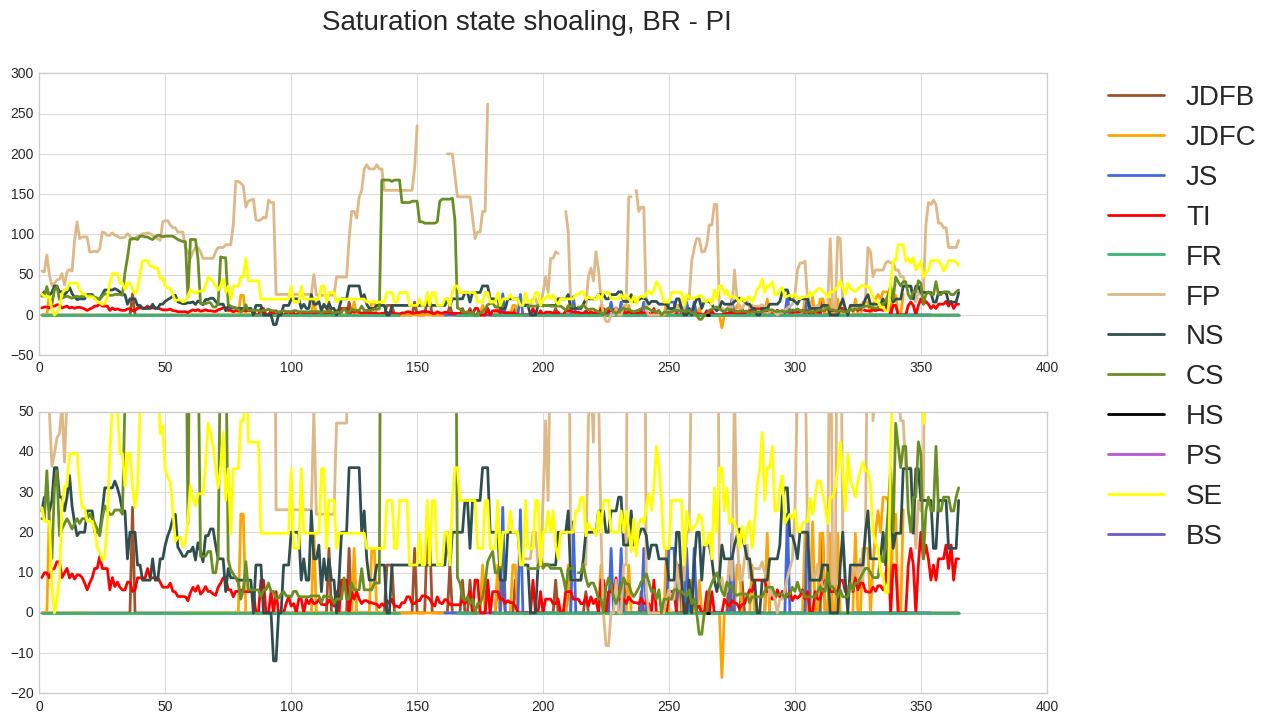

In [110]:
fx = 13
fy = 8
fig = plt.figure(figsize=(fx,fy))

ax = fig.add_subplot(2,1,1)

for s in range(0,12):
    stn = stns[s]
    pattern = OmA_dict_PI['OmA_sathor'][s,:] - OmA_dict_BR['OmA_sathor'][s,:]
    ax.plot(t, pattern, color = cs.STATIONS[stn]['color'],linewidth = 2 )
    ax.legend(stns , fontsize = 20, bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)

ax = fig.add_subplot(2,1,2)

for s in range(0,12):
    stn = stns[s]
    pattern = OmA_dict_PI['OmA_sathor'][s,:] - OmA_dict_BR['OmA_sathor'][s,:]
    ax.plot(t, pattern, color = cs.STATIONS[stn]['color'],linewidth = 2 )
    ax.set_ylim([-20,50])
    
fig.suptitle('Saturation state shoaling, BR - PI', fontsize = 20)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


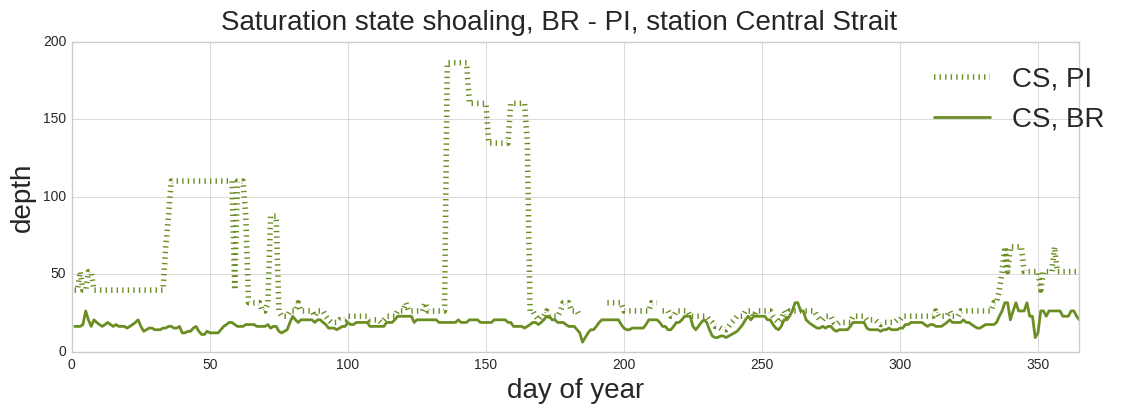

In [129]:
fx = 13
fy = 4
tstn = 'CS'
fig = plt.figure(figsize=(fx,fy))
ax = fig.add_subplot(1,1,1)

for s in range(0,12):
    stn = stns[s]
    patternBR = OmA_dict_BR['OmA_sathor'][s,:] 
    patternPI = OmA_dict_PI['OmA_sathor'][s,:]
    if stn == tstn:
        ax.plot(t, patternPI, color = cs.STATIONS[stn]['color'],linewidth = 4 , linestyle = ':', label = stn + ', PI')

        ax.plot(t, patternBR, color = cs.STATIONS[stn]['color'],linewidth = 2 , linestyle = '-', label = stn + ', BR')
    ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize = 20)
    ax.set_ylabel('depth', fontsize = 20)
    ax.set_xlabel('day of year', fontsize = 20)
    ax.set_xlim([0,365])
fig.suptitle('Saturation state shoaling, BR - PI, station '+ cs.STATIONS[tstn]['fullname'], fontsize = 20)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


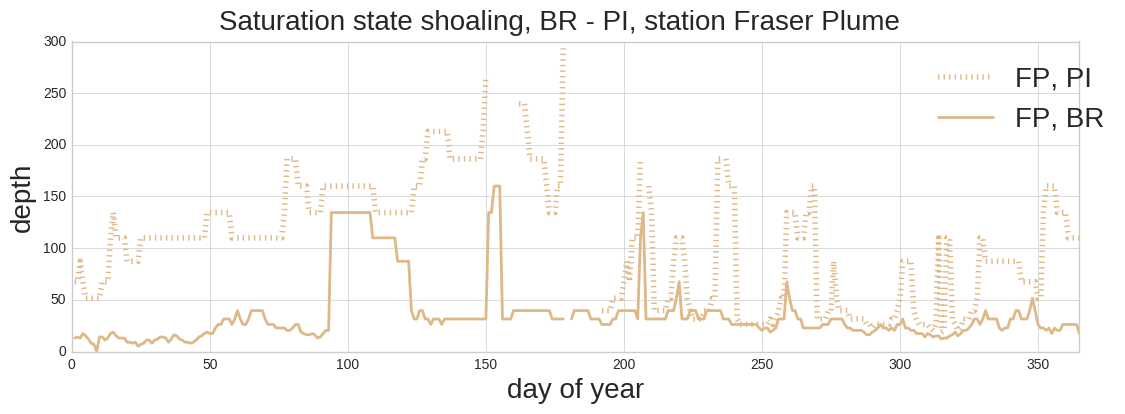

In [128]:
fx = 13
fy = 4
tstn = 'FP'
fig = plt.figure(figsize=(fx,fy))
ax = fig.add_subplot(1,1,1)

for s in range(0,12):
    stn = stns[s]
    patternBR = OmA_dict_BR['OmA_sathor'][s,:] 
    patternPI = OmA_dict_PI['OmA_sathor'][s,:]
    if stn == tstn:
        ax.plot(t, patternPI, color = cs.STATIONS[stn]['color'],linewidth = 4 , linestyle = ':', label = stn + ', PI')

        ax.plot(t, patternBR, color = cs.STATIONS[stn]['color'],linewidth = 2 , linestyle = '-', label = stn + ', BR')
    ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize = 20)
    ax.set_ylabel('depth', fontsize = 20)
    ax.set_xlabel('day of year', fontsize = 20)
    ax.set_xlim([0,365])
fig.suptitle('Saturation state shoaling, BR - PI, station '+ cs.STATIONS[tstn]['fullname'], fontsize = 20)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


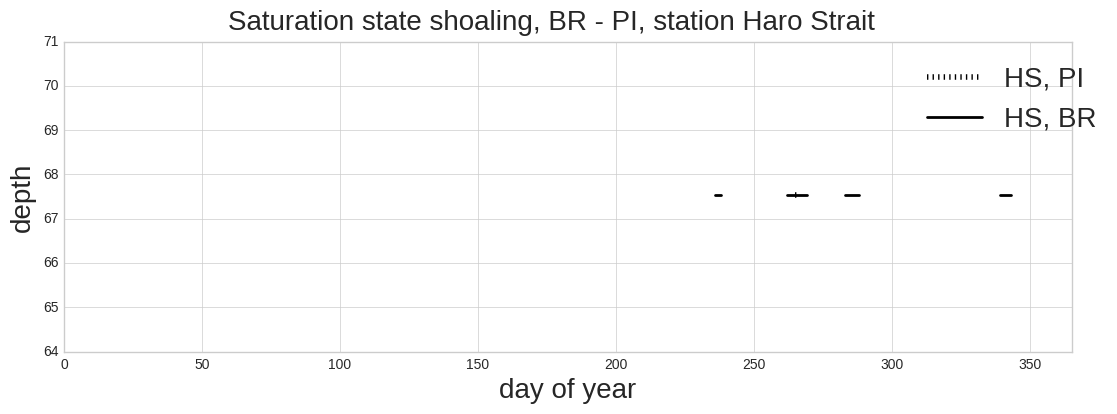

In [131]:
fx = 13
fy = 4
tstn = 'HS'
fig = plt.figure(figsize=(fx,fy))
ax = fig.add_subplot(1,1,1)

for s in range(0,12):
    stn = stns[s]
    patternBR = OmA_dict_BR['OmA_sathor'][s,:] 
    patternPI = OmA_dict_PI['OmA_sathor'][s,:]
    if stn == tstn:
        ax.plot(t, patternPI, color = cs.STATIONS[stn]['color'],linewidth = 4 , linestyle = ':', label = stn + ', PI')

        ax.plot(t, patternBR, color = cs.STATIONS[stn]['color'],linewidth = 2 , linestyle = '-', label = stn + ', BR')
    ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize = 20)
    ax.set_ylabel('depth', fontsize = 20)
    ax.set_xlabel('day of year', fontsize = 20)
    ax.set_xlim([0,365])
fig.suptitle('Saturation state shoaling, BR - PI, station '+ cs.STATIONS[tstn]['fullname'], fontsize = 20)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


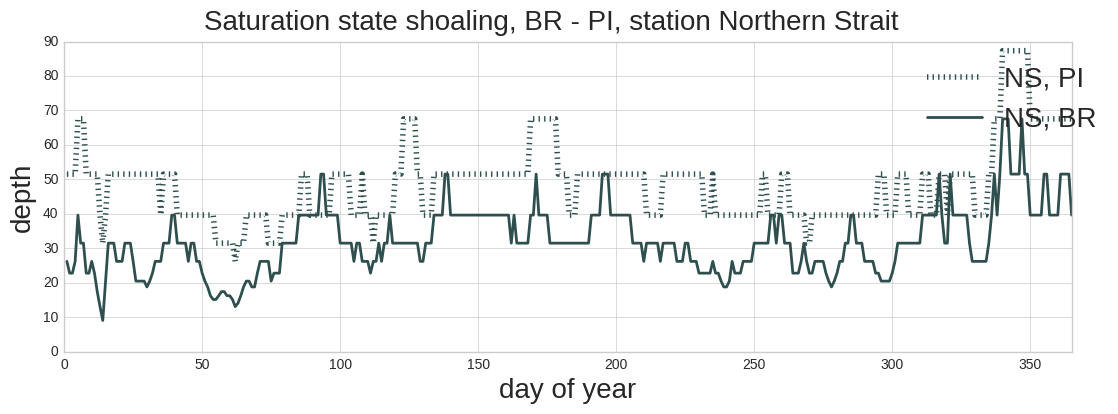

In [132]:
fx = 13
fy = 4
tstn = 'NS'
fig = plt.figure(figsize=(fx,fy))
ax = fig.add_subplot(1,1,1)

for s in range(0,12):
    stn = stns[s]
    patternBR = OmA_dict_BR['OmA_sathor'][s,:] 
    patternPI = OmA_dict_PI['OmA_sathor'][s,:]
    if stn == tstn:
        ax.plot(t, patternPI, color = cs.STATIONS[stn]['color'],linewidth = 4 , linestyle = ':', label = stn + ', PI')

        ax.plot(t, patternBR, color = cs.STATIONS[stn]['color'],linewidth = 2 , linestyle = '-', label = stn + ', BR')
    ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize = 20)
    ax.set_ylabel('depth', fontsize = 20)
    ax.set_xlabel('day of year', fontsize = 20)
    ax.set_xlim([0,365])
fig.suptitle('Saturation state shoaling, BR - PI, station '+ cs.STATIONS[tstn]['fullname'], fontsize = 20)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


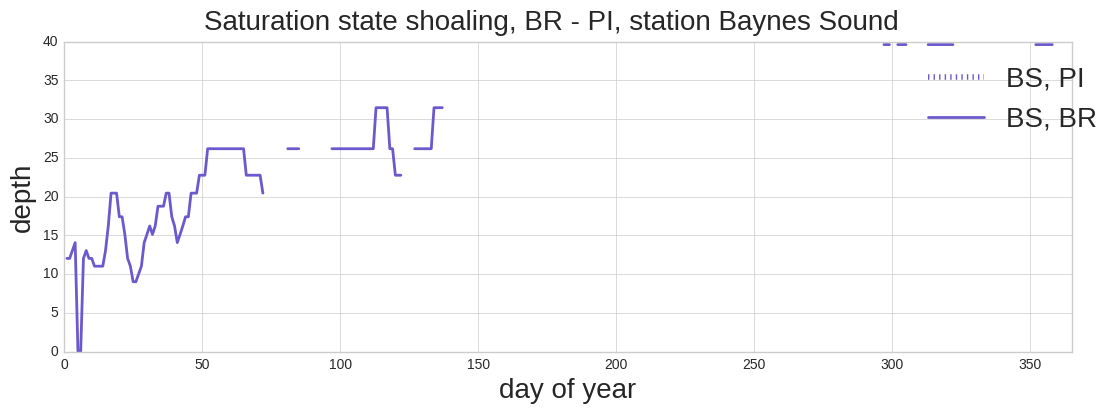

In [133]:
fx = 13
fy = 4
tstn = 'BS'
fig = plt.figure(figsize=(fx,fy))
ax = fig.add_subplot(1,1,1)

for s in range(0,12):
    stn = stns[s]
    patternBR = OmA_dict_BR['OmA_sathor'][s,:] 
    patternPI = OmA_dict_PI['OmA_sathor'][s,:]
    if stn == tstn:
        ax.plot(t, patternPI, color = cs.STATIONS[stn]['color'],linewidth = 4 , linestyle = ':', label = stn + ', PI')

        ax.plot(t, patternBR, color = cs.STATIONS[stn]['color'],linewidth = 2 , linestyle = '-', label = stn + ', BR')
    ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize = 20)
    ax.set_ylabel('depth', fontsize = 20)
    ax.set_xlabel('day of year', fontsize = 20)
    ax.set_xlim([0,365])
fig.suptitle('Saturation state shoaling, BR - PI, station '+ cs.STATIONS[tstn]['fullname'], fontsize = 20)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


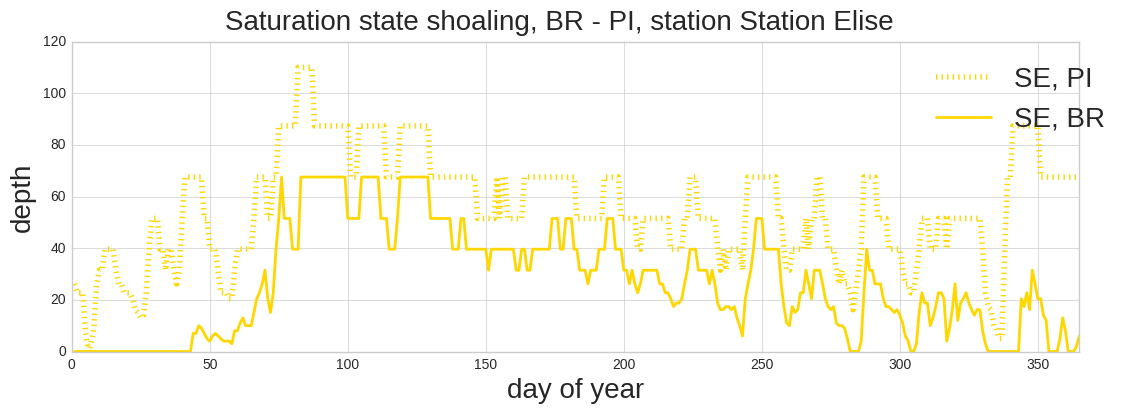

In [136]:
fx = 13
fy = 4
tstn = 'SE'
fig = plt.figure(figsize=(fx,fy))
ax = fig.add_subplot(1,1,1)

for s in range(0,12):
    stn = stns[s]
    patternBR = OmA_dict_BR['OmA_sathor'][s,:] 
    patternPI = OmA_dict_PI['OmA_sathor'][s,:]
    if stn == tstn:
        ax.plot(t, patternPI, color = 'gold',linewidth = 4 , linestyle = ':', label = stn + ', PI')

        ax.plot(t, patternBR, color = 'gold',linewidth = 2 , linestyle = '-', label = stn + ', BR')
    ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize = 20)
    ax.set_ylabel('depth', fontsize = 20)
    ax.set_xlabel('day of year', fontsize = 20)
    ax.set_xlim([0,365])
fig.suptitle('Saturation state shoaling, BR - PI, station '+ cs.STATIONS[tstn]['fullname'], fontsize = 20)